## Code for finetuning basemodel

In [1]:
%run setup.ipynb

## Unfreezing layer 4 of trained basemodel

In [2]:
model, info = load_function("basemodel.tar")

c:\Users\annek\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [4]:
epochs = 50
unfreeze_layer4(model)
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
model, info = train_model(model, optimizer, num_epoch=epochs, train=dataloader_train, validation=dataloader_validation)


Epoch 1/50
----------
Train Loss: 0.1106 Acc: 0.9641
Val Loss: 0.0183 Acc: 1.0000
Epoch time 2m 39s
----------

Epoch 2/50
----------
Train Loss: 0.0384 Acc: 0.9904
Val Loss: 0.8047 Acc: 0.9615
Epoch time 2m 38s
----------

Epoch 3/50
----------
Train Loss: 0.0429 Acc: 0.9952
Val Loss: 0.0597 Acc: 0.9712
Epoch time 2m 29s
----------

Epoch 4/50
----------
Train Loss: 0.0503 Acc: 0.9868
Val Loss: 0.0402 Acc: 0.9712
Epoch time 2m 29s
----------

Epoch 5/50
----------
Train Loss: 0.0204 Acc: 0.9928
Val Loss: 0.0227 Acc: 0.9904
Epoch time 2m 34s
----------

Epoch 6/50
----------
Train Loss: 0.0045 Acc: 1.0000
Val Loss: 0.0062 Acc: 1.0000
Epoch time 2m 38s
----------

Epoch 7/50
----------
Train Loss: 0.0014 Acc: 1.0000
Val Loss: 0.0058 Acc: 1.0000
Epoch time 2m 31s
----------

Epoch 8/50
----------
Train Loss: 0.0012 Acc: 1.0000
Val Loss: 0.0119 Acc: 0.9904
Epoch time 2m 31s
----------

Epoch 9/50
----------
Train Loss: 0.0004 Acc: 1.0000
Val Loss: 0.0029 Acc: 1.0000
Epoch time 2m 31s
----

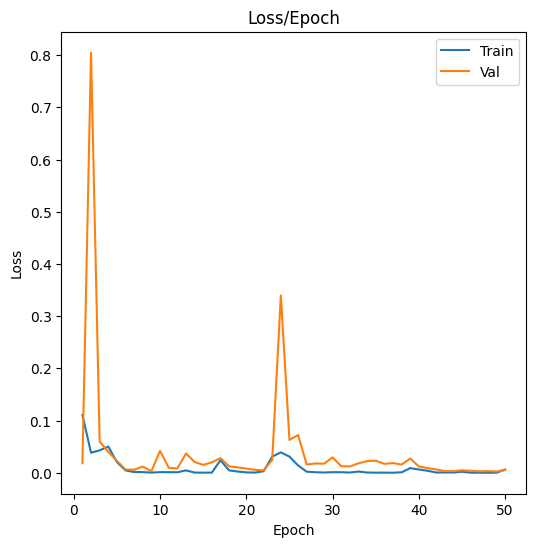

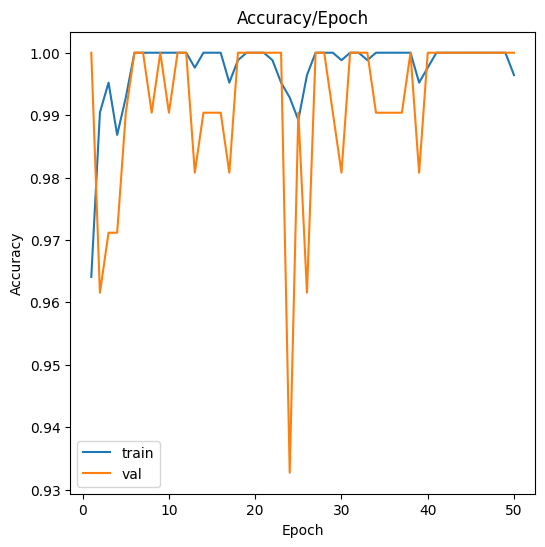

Training accuracies
[0.9640718562874252, 0.9904191616766467, 0.9952095808383233, 0.9868263473053892, 0.9928143712574851, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9976047904191617, 1.0, 1.0, 1.0, 0.9952095808383233, 0.9988023952095808, 1.0, 1.0, 1.0, 0.9988023952095808, 0.9952095808383233, 0.9928143712574851, 0.9892215568862276, 0.9964071856287425, 1.0, 1.0, 1.0, 0.9988023952095808, 1.0, 1.0, 0.9988023952095808, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9952095808383233, 0.9976047904191617, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9964071856287425]
Validation Accuracies
[1.0, 0.9615384615384616, 0.9711538461538461, 0.9711538461538461, 0.9903846153846154, 1.0, 1.0, 0.9903846153846154, 1.0, 0.9903846153846154, 1.0, 1.0, 0.9807692307692307, 0.9903846153846154, 0.9903846153846154, 0.9903846153846154, 0.9807692307692307, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.9326923076923077, 0.9903846153846154, 0.9615384615384616, 1.0, 1.0, 0.9903846153846154, 0.9807692307692307, 1.0, 1.0, 1.0, 0.9903846153846154, 0.990384615

In [6]:
plot_loss(info["train_loss"], info["val_loss"])
plot_accuracies(info["train_acc"], info["val_acc"], ["train", "val"])
print_stats(info)

In [8]:
truel, predl = labels_and_predictions(dataloader_test, model, device)

Accuracy 98.09523809523809
              precision    recall  f1-score   support

     blueTit       1.00      1.00      1.00        15
   chaffinch       1.00      1.00      1.00        15
     coalTit       0.94      1.00      0.97        15
   goldfinch       1.00      1.00      1.00        15
    greatTit       1.00      0.87      0.93        15
       robin       0.94      1.00      0.97        15
    starling       1.00      1.00      1.00        15

    accuracy                           0.98       105
   macro avg       0.98      0.98      0.98       105
weighted avg       0.98      0.98      0.98       105

[[15  0  0  0  0  0  0]
 [ 0 15  0  0  0  0  0]
 [ 0  0 15  0  0  0  0]
 [ 0  0  0 15  0  0  0]
 [ 0  0  1  0 13  1  0]
 [ 0  0  0  0  0 15  0]
 [ 0  0  0  0  0  0 15]]


<AxesSubplot: title={'center': 'Confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

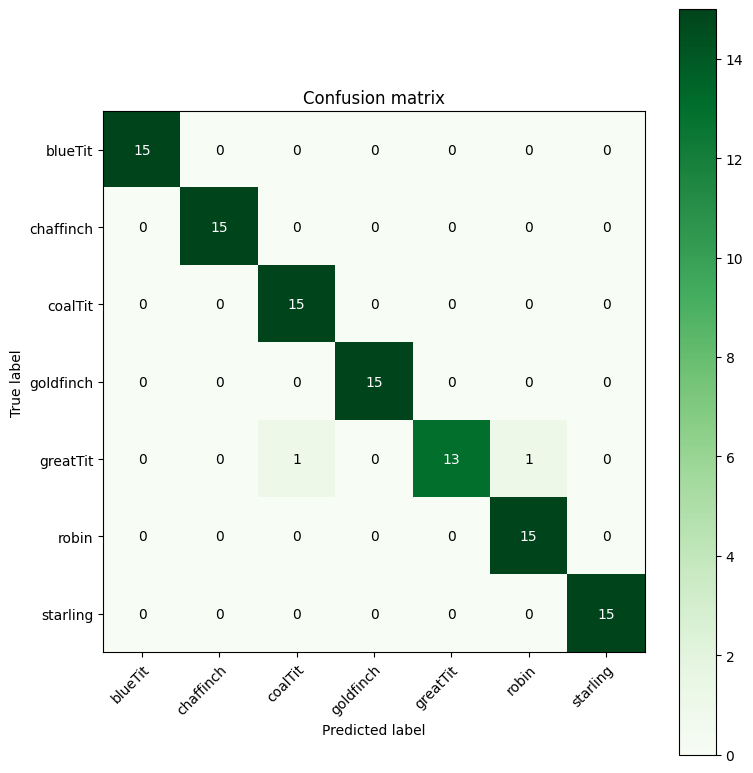

In [9]:
test_acc = (np.sum(predl==truel)/predl.size * 100)
print("Accuracy", test_acc)
print(classification_report(truel, predl, target_names=class_labels))
plot_confusion_matrix(truel, predl, class_labels)

In [10]:
model.eval()
feeder_truel, feeder_predl = labels_and_predictions(dataloader_feeder, model, device)

Accuracy 60.169772531334964
              precision    recall  f1-score   support

     blueTit       0.88      0.21      0.33      2078
   chaffinch       0.87      0.45      0.60      3552
     coalTit       0.66      0.70      0.68      1846
   goldfinch       0.72      0.93      0.81      2000
    greatTit       0.56      0.43      0.49      2033
       robin       0.39      0.73      0.51      1428
    starling       0.49      0.91      0.64      2142

    accuracy                           0.60     15079
   macro avg       0.65      0.62      0.58     15079
weighted avg       0.69      0.60      0.58     15079

[[ 427   61  169   93  501  295  532]
 [   2 1611   91  278   78  950  542]
 [   1  109 1295  135   91   59  156]
 [   0    7    9 1869    6  106    3]
 [  40   33  320  228  880  134  398]
 [   0    0    3    0    1 1043  381]
 [  14   32   64    7    4   73 1948]]


<AxesSubplot: title={'center': 'Normalized confusion matrix'}, xlabel='Predicted label', ylabel='True label'>

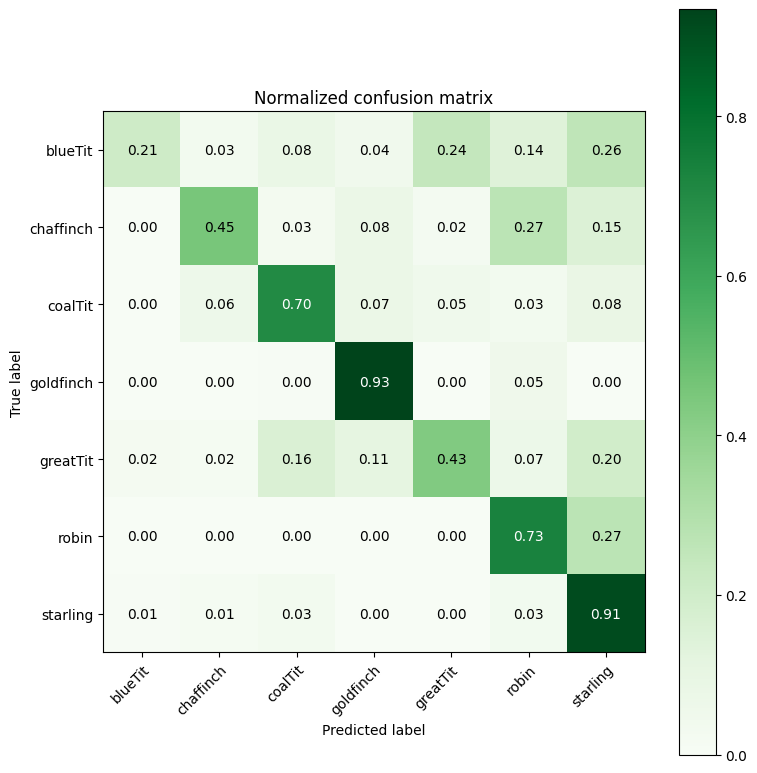

In [11]:
feeder_acc = (np.sum(feeder_predl==feeder_truel)/feeder_predl.size * 100)
print("Accuracy", feeder_acc)
print(classification_report(feeder_truel, feeder_predl, target_names=class_labels))
plot_confusion_matrix(feeder_truel, feeder_predl, class_labels, normalize=True)

In [13]:
save_function("fine_base_50_layer4.tar", model, info, extra_info={"test_acc": test_acc, "feeder_acc": feeder_acc, "optimizer": "Adam with lambda", "note" : "layer4 unfrozen"})

## Running unfreeze layer 4 on model aug 1

In [14]:
model, info = load_function("aug1Model_50.tar", model_key="aug", info_key="aug_info")

c:\Users\annek\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


In [ ]:
unfreeze_layer4(model)
epochs=50
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=0.001)
model, info = train_model(model, optimizer, num_epoch=epochs, train=dataloader_train, validation=dataloader_validation)

In [ ]:
plot_loss(info["train_loss"], info["val_loss"])
plot_accuracies(info["train_acc"], info["val_acc"], ["train", "val"])
print_stats(info)

In [ ]:
truel, predl = labels_and_predictions(dataloader_test, model, device)
test_acc = (np.sum(predl==truel)/predl.size * 100)
print("Accuracy", test_acc)
print(classification_report(truel, predl, target_names=class_labels))
plot_confusion_matrix(truel, predl, class_labels, normalize=True)

In [ ]:
feeder_truel, feeder_predl = labels_and_predictions(dataloader_feeder, model, device)

In [ ]:
feeder_acc = (np.sum(feeder_predl==feeder_truel)/feeder_predl.size * 100)
print("Accuracy", feeder_acc)
print(classification_report(feeder_truel, feeder_predl, target_names=class_labels))
plot_confusion_matrix(feeder_truel, feeder_predl, class_labels, normalize=True)

In [ ]:
save_function("fine_aug_50_layer4.tar", model, info, extra_info={"test_acc": test_acc, "feeder_acc": feeder_acc, "optimizer": "Adam with lambda", "note" : "aug1, layer4 unfrozen"})